In [32]:
import os
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [33]:
my_legends = ["ES", "A/B", "TSS", "UCBS", "EGS", "PSI", "UES"]
my_colors = ['red', 'lime', 'blueviolet', 'maroon', 'darkgray', 'black', "yellowgreen"]
my_symbols = ['square', 'circle', 'triangle-up', 'x', 'diamond', 'pentagon', "star"]
my_l2c, my_l2s = dict(), dict()
for i, legend in enumerate(my_legends):
    my_l2c[legend] = my_colors[i]
    my_l2s[legend] = my_symbols[i]

In [34]:
def sd_return_fig(algos, key2data, max_rewards, display_row_xaxis = True, xrange_rows = [], marker_size = 12, line_add = 0.8):
    text = "$\sigma$"
    fig = make_subplots(
        rows = 2, cols = len(key2data),
        y_title="Power",
        column_titles = list(key2data.keys()),
        shared_yaxes=True,
        horizontal_spacing=0.03,
        vertical_spacing=0.15,
    )
    for i, (key, data) in enumerate(key2data.items()):
        scatters, rows, cols = list(), list(), list()
        for j, algo in enumerate(algos):
            # power reward trade-off
            scatters.append(
                go.Scatter(
                    x=[data[algo]["regret"] / max_rewards],
                    y=[data[algo]["power"]],
                    legendgroup=algo,
                    mode="markers",
                    marker=go.scatter.Marker(
                        color=[my_l2c[algo]],
                        symbol=[my_l2s[algo]],
                        size=marker_size,
                    ), 
                    name=algo,
                    orientation='h',
                    showlegend=True if i == 0 else False,
                    xaxis='x',
                    yaxis='y',
                )
            )
            rows.append(1),
            cols.append(i + 1),
            # power sample size trade-off
            scatters.append(
                go.Scatter(
                    x=[data[algo]["samples"]],
                    y=[data[algo]["power"]],
                    legendgroup=algo,
                    mode="markers",
                    marker=go.scatter.Marker(
                        color=[my_l2c[algo]],
                        symbol=[my_l2s[algo]],
                        size=marker_size,
                    ), 
                    name=algo,
                    orientation='h',
                    showlegend=False,
                    xaxis='x',
                    yaxis='y',
                )
            )
            rows.append(2),
            cols.append(i + 1),
        fig.add_traces(
            scatters, rows=rows, cols=cols
        )
    
    fig.add_hline(line_add)
    fig.update_layout(
        legend=dict(
            orientation='h',
            x=0.33,
            y=-0.15,
        ),
        height=800,
        width=1600,
        plot_bgcolor='rgb(242,242,242)',
        font_size=16,
    )
    if display_row_xaxis:
        fig.update_xaxes(title_text="Normalized averaged regrets", row=1, col=3)
        fig.update_xaxes(title_text="Averaged sample size per arm", row=2, col=3)
    for i, xrange in enumerate(xrange_rows):
        for j in range(len(key2data.keys())):
            fig.update_xaxes(range=xrange, row=i + 1, col=j + 1)
    fig.update_annotations(font=dict(size=20))
    return fig

In [35]:
def get_key2data(df, idx2key, algos):
    power_idx, sample_idx, regret_idx = 0, 1, 2
    key2data = dict()
    for idx, key in idx2key.items():
        key2data[key] = dict()
        for algo in algos:
            key2data[key][algo] = dict()
    for idx, key in idx2key.items():
        for algo in algos:
            key2data[key][algo]["power"] = df.iloc[int(idx)][f"{algo}_{power_idx}"]
            key2data[key][algo]["samples"] = df.iloc[int(idx)][f"{algo}_{sample_idx}"]
            key2data[key][algo]["regret"] = df.iloc[int(idx)][f"{algo}_{regret_idx}"]
    return key2data

In [36]:
df = pd.read_csv("res_sim_5arm_gauss_var_sigma.csv")
df

,ES_0,ES_1,ES_2,UES_0,UES_1,UES_2,TSS_0,TSS_1,TSS_2,UCBS_0,...,UCBS_2,EGS_0,EGS_1,EGS_2,PSI_0,PSI_1,PSI_2,A/B_0,A/B_1,A/B_2
0,0.706,915.439,0.0070,0.649,954.111,0.0302,0.563,993.606,0.0079,0.702,...,0.0121,0.485,1062.337,0.0051,0.212,1127.484,0.0156,0.161,1000,0.0352
1,0.796,741.297,0.0091,0.747,768.689,0.0412,0.681,830.362,0.0105,0.790,...,0.0166,0.622,856.454,0.0068,0.389,985.004,0.0169,0.291,1000,0.0495
2,0.855,621.434,0.0124,0.815,633.961,0.0549,0.782,684.179,0.0142,0.840,...,0.0261,0.721,712.528,0.0091,0.525,725.140,0.0182,0.437,1000,0.0707
3,0.914,460.124,0.0229,0.883,490.000,0.0806,0.847,523.918,0.0202,0.899,...,0.0523,0.814,543.343,0.0129,0.698,512.658,0.0213,0.623,1000,0.1112
4,0.942,390.513,0.0362,0.924,407.035,0.1078,0.890,439.611,0.0265,0.937,...,0.0830,0.876,467.199,0.0158,0.781,368.422,0.0237,0.723,1000,0.1575


{'$\\sigma_{\\Delta}^2 = 0.05$': {'ES': {'power': 0.706, 'samples': 915.439, 'regret': 0.007}, 'UES': {'power': 0.649, 'samples': 954.111, 'regret': 0.0302}, 'TSS': {'power': 0.563, 'samples': 993.606, 'regret': 0.0079}, 'UCBS': {'power': 0.702, 'samples': 951.257, 'regret': 0.0121}, 'EGS': {'power': 0.485, 'samples': 1062.337, 'regret': 0.0051}, 'PSI': {'power': 0.212, 'samples': 1127.484, 'regret': 0.0156}, 'A/B': {'power': 0.161, 'samples': 1000.0, 'regret': 0.0352}}, '$\\sigma_{\\Delta}^2 = 0.1$': {'ES': {'power': 0.796, 'samples': 741.297, 'regret': 0.0091}, 'UES': {'power': 0.747, 'samples': 768.689, 'regret': 0.0412}, 'TSS': {'power': 0.681, 'samples': 830.362, 'regret': 0.0105}, 'UCBS': {'power': 0.79, 'samples': 790.889, 'regret': 0.0166}, 'EGS': {'power': 0.622, 'samples': 856.454, 'regret': 0.0068}, 'PSI': {'power': 0.389, 'samples': 985.004, 'regret': 0.0169}, 'A/B': {'power': 0.291, 'samples': 1000.0, 'regret': 0.0495}}, '$\\sigma_{\\Delta}^2 = 0.2$': {'ES': {'power': 0.85

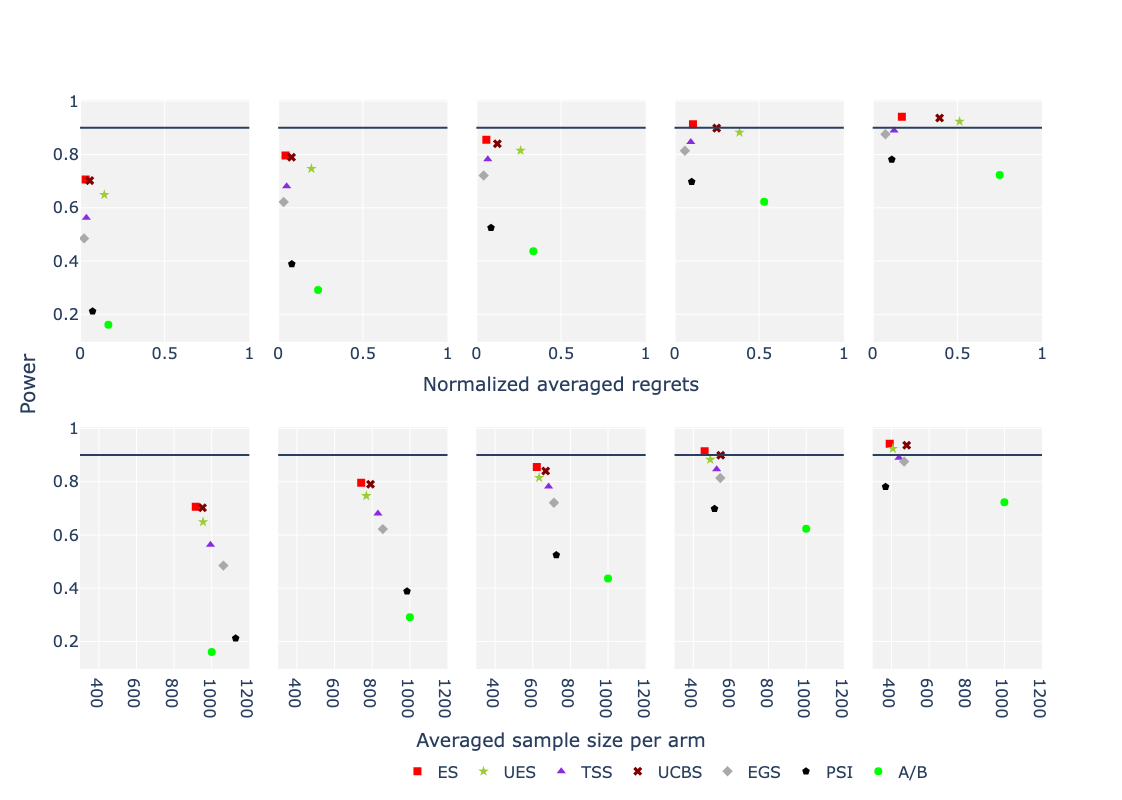

In [37]:
df = pd.read_csv("res_sim_5arm_gauss_var_sigma.csv")
idx2key = {
    "0": r"$\sigma_{\Delta}^2 = 0.05$",
    "1": r"$\sigma_{\Delta}^2 = 0.1$",
    "2": r"$\sigma_{\Delta}^2 = 0.2$",
    "3": r"$\sigma_{\Delta}^2 = 0.5$",
    "4": r"$\sigma_{\Delta}^2 = 1$",
}
algos = ["ES", "UES", "TSS", "UCBS", "EGS", "PSI", "A/B"]
key2data = get_key2data(df, idx2key, algos)
print(key2data)
fig = sd_return_fig(algos, key2data, 0.21, True, [[0.00, 1.0], [300, 1200]], 8, 0.9)
# print(fig.layout)
fig.show()
plotly.io.write_image(fig, 'sim_5arm_gauss_var_sigma.pdf', format='pdf')

In [38]:
df = pd.read_csv("res_sim_gauss_var_numd.csv")
df

,ES_0,ES_1,ES_2,UES_0,UES_1,UES_2,TSS_0,TSS_1,TSS_2,UCBS_0,...,UCBS_2,EGS_0,EGS_1,EGS_2,PSI_0,PSI_1,PSI_2,A/B_0,A/B_1,A/B_2
0,0.655,720.661,0.0125,0.587,771.055,0.1102,0.619,766.182,0.0248,0.632,...,0.0374,0.607,789.901,0.0134,0.483,743.445,0.0109,0.378,1000,0.1251
1,0.858,622.204,0.0124,0.832,630.529,0.0529,0.778,705.781,0.0139,0.845,...,0.0253,0.711,707.540,0.0091,0.525,731.802,0.0180,0.441,1000,0.0702
2,0.824,752.246,0.0091,0.783,787.181,0.0319,0.651,902.869,0.0093,0.805,...,0.0132,0.562,893.590,0.0064,0.314,945.249,0.0183,0.220,1000,0.0424
3,0.730,929.621,0.0071,0.665,966.015,0.0257,0.515,1100.518,0.0077,0.696,...,0.0098,0.423,1114.251,0.0051,0.160,1183.833,0.0169,0.100,1000,0.0317


{'$D = 2$': {'ES': {'power': 0.655, 'samples': 720.661, 'regret': 0.0125}, 'UES': {'power': 0.587, 'samples': 771.055, 'regret': 0.1102}, 'TSS': {'power': 0.619, 'samples': 766.182, 'regret': 0.0248}, 'UCBS': {'power': 0.632, 'samples': 799.366, 'regret': 0.0374}, 'EGS': {'power': 0.607, 'samples': 789.901, 'regret': 0.0134}, 'PSI': {'power': 0.483, 'samples': 743.445, 'regret': 0.0109}, 'A/B': {'power': 0.378, 'samples': 1000.0, 'regret': 0.1251}}, '$D = 5$': {'ES': {'power': 0.858, 'samples': 622.204, 'regret': 0.0124}, 'UES': {'power': 0.832, 'samples': 630.529, 'regret': 0.0529}, 'TSS': {'power': 0.778, 'samples': 705.781, 'regret': 0.0139}, 'UCBS': {'power': 0.845, 'samples': 679.368, 'regret': 0.0253}, 'EGS': {'power': 0.711, 'samples': 707.54, 'regret': 0.0091}, 'PSI': {'power': 0.525, 'samples': 731.802, 'regret': 0.018}, 'A/B': {'power': 0.441, 'samples': 1000.0, 'regret': 0.0702}}, '$D = 10$': {'ES': {'power': 0.824, 'samples': 752.246, 'regret': 0.0091}, 'UES': {'power': 0.7

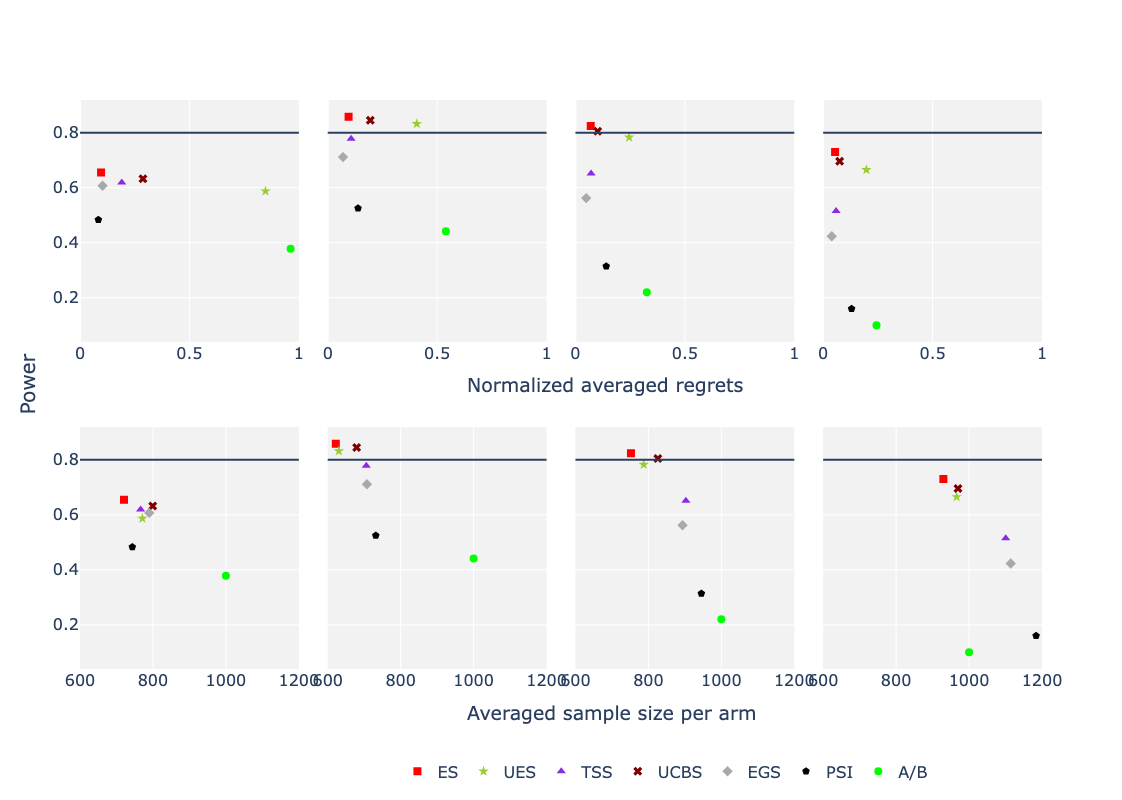

In [39]:
df = pd.read_csv("res_sim_gauss_var_numd.csv")
idx2key = {
    "0": r"$D = 2$",
    "1": r"$D = 5$",
    "2": r"$D = 10$",
    "3": r"$D = 15$",
}
algos = ["ES", "UES", "TSS", "UCBS", "EGS", "PSI", "A/B"]
key2data = get_key2data(df, idx2key, algos)
print(key2data)
fig = sd_return_fig(algos, key2data, 0.13, False, [[0.00, 1.00], [600, 1200]], 8, line_add=0.8)
fig.add_annotation(dict(
    font=dict(size=19),
    x=0.4,
    y=0.5,
    showarrow=False,
    text="Normalized averaged regrets",
    xanchor="left",
    xref="paper",
    yref="paper",
))
fig.add_annotation(dict(
    font=dict(size=19),
    x=0.4,
    y=-0.1,
    showarrow=False,
    text="Averaged sample size per arm",
    xanchor="left",
    xref="paper",
    yref="paper",
))

# print(fig.layout)
fig.show()
plotly.io.write_image(fig, 'sim_gauss_var_numd.pdf', format='pdf')

In [40]:
df = pd.read_csv('res_sim_gauss_var_numd.csv')
df

,ES_0,ES_1,ES_2,UES_0,UES_1,UES_2,TSS_0,TSS_1,TSS_2,UCBS_0,...,UCBS_2,EGS_0,EGS_1,EGS_2,PSI_0,PSI_1,PSI_2,A/B_0,A/B_1,A/B_2
0,0.655,720.661,0.0125,0.587,771.055,0.1102,0.619,766.182,0.0248,0.632,...,0.0374,0.607,789.901,0.0134,0.483,743.445,0.0109,0.378,1000,0.1251
1,0.858,622.204,0.0124,0.832,630.529,0.0529,0.778,705.781,0.0139,0.845,...,0.0253,0.711,707.540,0.0091,0.525,731.802,0.0180,0.441,1000,0.0702
2,0.824,752.246,0.0091,0.783,787.181,0.0319,0.651,902.869,0.0093,0.805,...,0.0132,0.562,893.590,0.0064,0.314,945.249,0.0183,0.220,1000,0.0424
3,0.730,929.621,0.0071,0.665,966.015,0.0257,0.515,1100.518,0.0077,0.696,...,0.0098,0.423,1114.251,0.0051,0.160,1183.833,0.0169,0.100,1000,0.0317


{'$K = 5$': {'ES': {'power': 0.863, 'samples': 608.954, 'regret': 0.0129}, 'UES': {'power': 0.824, 'samples': 655.928, 'regret': 0.0563}, 'TSS': {'power': 0.776, 'samples': 696.82, 'regret': 0.0143}, 'UCBS': {'power': 0.846, 'samples': 667.559, 'regret': 0.0257}, 'EGS': {'power': 0.724, 'samples': 708.747, 'regret': 0.0091}, 'PSI': {'power': 0.553, 'samples': 742.206, 'regret': 0.0187}, 'A/B': {'power': 0.45, 'samples': 1000.0, 'regret': 0.0702}}, '$K = 10$': {'ES': {'power': 0.888, 'samples': 612.805, 'regret': 0.0293}, 'UES': {'power': 0.766, 'samples': 733.449, 'regret': 0.1367}, 'TSS': {'power': 0.716, 'samples': 718.846, 'regret': 0.0343}, 'UCBS': {'power': 0.867, 'samples': 702.153, 'regret': 0.0609}, 'EGS': {'power': 0.656, 'samples': 799.797, 'regret': 0.0215}, 'PSI': {'power': 0.628, 'samples': 634.366, 'regret': 0.0325}, 'A/B': {'power': 0.403, 'samples': 1000.0, 'regret': 0.168}}, '$K = 15$': {'ES': {'power': 0.907, 'samples': 599.889, 'regret': 0.0386}, 'UES': {'power': 0.7

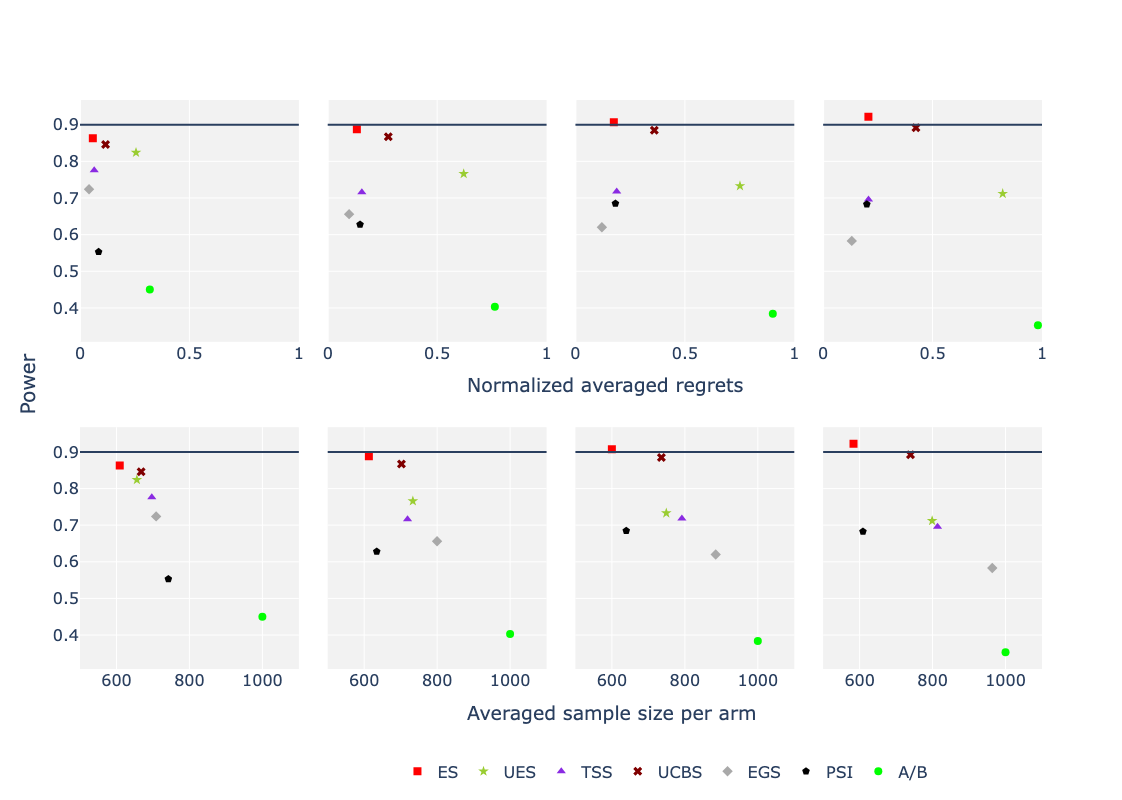

In [41]:
df = pd.read_csv("res_sim_gauss_var_numarm.csv")
idx2key = {
    "0": r"$K = 5$",
    "1": r"$K = 10$",
    "2": r"$K = 15$",
    "3": r"$K = 20$",
}
algos = ["ES", "UES", "TSS", "UCBS", "EGS", "PSI", "A/B"]
key2data = get_key2data(df, idx2key, algos)
print(key2data)
fig = sd_return_fig(algos, key2data, 0.22, False, [[0.00, 1.00], [500, 1100]], 8, line_add=0.9)
fig.add_annotation(dict(
    font=dict(size=19),
    x=0.4,
    y=0.5,
    showarrow=False,
    text="Normalized averaged regrets",
    xanchor="left",
    xref="paper",
    yref="paper",
))
fig.add_annotation(dict(
    font=dict(size=19),
    x=0.4,
    y=-0.1,
    showarrow=False,
    text="Averaged sample size per arm",
    xanchor="left",
    xref="paper",
    yref="paper",
))

# print(fig.layout)
fig.show()
plotly.io.write_image(fig, 'sim_gauss_var_numarm.pdf', format='pdf')